In [ ]:
!pip install numpy
!pip install --user matplotlib
!pip install --user scikit-learn

In [2]:
import random
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from numpy import linalg as LA

#producing fault distribution data (array)
def data_production(class_number,data_number) :
    
    r1 = [[40,60]]
    r2 = [[35,65]]
    r3 = [[30,70]]
    r4 = [[25,75]]
    r5 = [[20,80]]
    
    r = [r1,r2,r3,r4,r5,]
    r = r[class_number]
    group = len(r) 
    data = data_number;
    w = []; l = [];
    for i in range(0,group):
        for j in range(0,data):
            intra = np.zeros((100,100))
            while np.sum(intra.reshape(1,10000)) < random.randrange(25,101) :            
                intra[random.randrange(r[i][0],r[i][1]),random.randrange(r[i][0],r[i][1])] = 1
            w.append(intra); l.append(i)
    w = np.array(w)
    X = w.reshape(data*group,-1); y = np.array(l)
  
    return X,y

def image_adjust(X,number,cmap,min,max):
    plt.figure()
    ax = plt.gca()
    plt.xlim(min+0.5,max-0.5)
    plt.ylim(min+0.5,max-0.5)
    plt.imshow(X[number,:].reshape(100,100),cmap=cmap, vmin = -1.5, vmax = 1.5, interpolation='nearest')
    plt.colorbar()
    
def cumulative_eigenvalue(X,Nd):
    M = np.mean(X.T, axis=1)
    C = X-M
    co = np.cov(C.T)
    values, vectors = LA.eig(co)
    values = np.real(np.sort(values)[::-1])
    ratio = []
    for i in range(0,len(values)):
        ratio.append(values[i]/sum(values))
    plt.plot(np.cumsum(ratio)[:3000],label=Nd)

# Fig. 3a

## plotting explained variance

C:\Users\supre\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0, 0.5, 'explained variance')

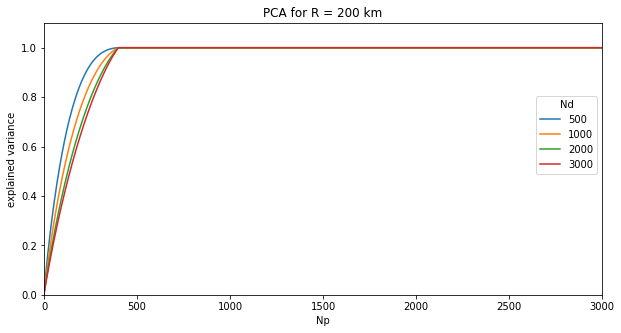

In [9]:
import numpy as np
from matplotlib import pyplot as plt
#class_number = {0:R=200 km, 1:300 km, 2:400 km, 3:500 km, 4: 600 km}
class_number =  0
#list of number of data
Nd = [500,1000,2000,3000]
#list of principal components
Np = [500,1000,2000,3000]
fig = plt.figure(figsize=(10,5))
plt.xlim(0,3000)
ax = plt.subplot(111)
plt.ylim(0,1.1)
for i in range(0,len(Nd)):
    X_train,y_train = data_production(class_number,Nd[i])
    cumulative_eigenvalue(X_train,Nd[i])


plt.title('PCA for R = 200 km')
ax.legend(title='Nd',bbox_to_anchor=(1.0, 0.34))
plt.xlabel('Np')
plt.ylabel('explained variance')

## reconstruction of reduced data

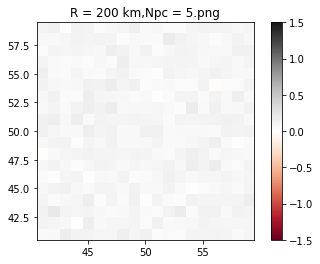

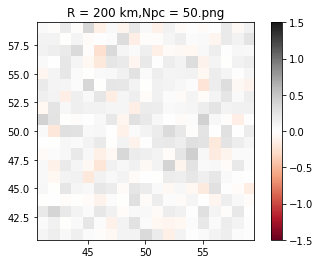

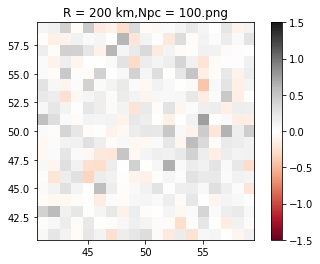

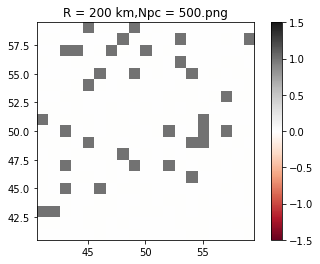

In [10]:
#class_number = {0:R=200 km, 1:300 km, 2:400 km, 3:500 km, 4: 600 km}
class_number = 0 
#number of data
data_number = 3000
#list of principal components
Np = [5,50,100,500]

for j in range(0,len(Np)):
    pca = PCA(n_components=Np[j],svd_solver='auto', whiten=True).fit(X_train)
    X_train_ = pca.transform(X_train)
    X_recon = pca.inverse_transform(X_train_)
    image_adjust(X_recon,0,'RdGy',40,60)
    plt.title('R = 200 km,Npc = %d.png' %Np[j])
    plt.savefig('R = 200 km, Npc = %d.eps' %Np[j],dpi = 500, Transparent = False)
    #plt.savefig('R = 340 km, fault = %d, Npc = %d.eps' %(i,Np[j]))

# Fig. 3b

## plotting explained variance

C:\Users\supre\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0, 0.5, 'explained variance')

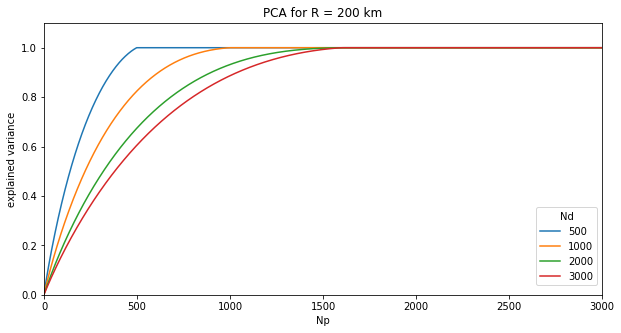

In [18]:
import numpy as np
from matplotlib import pyplot as plt

#class_number = {0:R=200 km, 1:300 km, 2:400 km, 3:500 km, 4: 600 km}
class_number =  2
#list of number of data
Nd = [500,1000,2000,3000]
#list of principal components
Np = [500,1000,2000,3000]
fig = plt.figure(figsize=(10,5))
plt.xlim(0,3000)
ax = plt.subplot(111)
plt.ylim(0,1.1)
for i in range(0,len(Nd)):
    X_train,y_train = data_production(class_number,Nd[i])
    cumulative_eigenvalue(X_train,Nd[i])


plt.title('PCA for R = 200 km')
ax.legend(title='Nd',bbox_to_anchor=(1.0, 0.34))
plt.xlabel('Np')
plt.ylabel('explained variance')

## reconstruction of reduced data

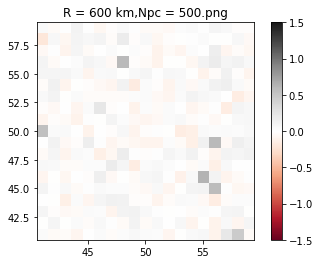

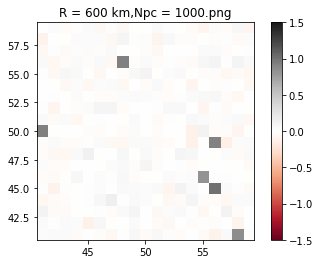

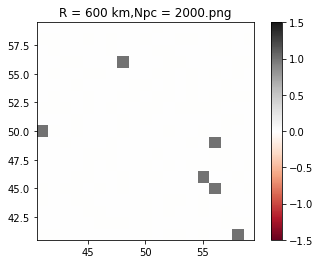

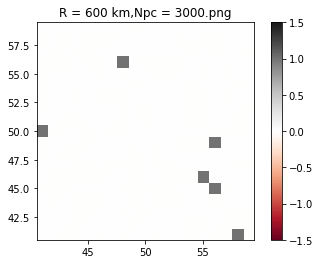

In [19]:
#class_number = {0:R=200 km, 1:300 km, 2:400 km, 3:500 km, 4: 600 km}\
class_number = 4
#number of data\
data_number = 3000
#list of principal components
Np = [500,1000,2000,3000]

for j in range(0,len(Np)):
    pca = PCA(n_components=Np[j],svd_solver='auto', whiten=True).fit(X_train)
    X_train_ = pca.transform(X_train)
    X_recon = pca.inverse_transform(X_train_)
    image_adjust(X_recon,0,'RdGy',20,80)
    plt.title('R = 600 km,Npc = %d.png' %Np[j])
    plt.savefig('R = 600 km, Npc = %d.eps' %Np[j],dpi = 500, Transparent = False)
    #plt.savefig('R = 340 km, fault = %d, Npc = %d.eps' %(i,Np[j]))

# plotting explained variance using Sci-kit learn toolkit

# Fig. 3a

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
class_number =  0
Nd = [500,1000,2000,3000]
Np = [500,1000,2000,3000]
plt.figure(figsize=(10,5))
plt.xlim(0,3000)
plt.ylim(0,1.1)
for i in range(0,len(Nd)):
    X_train,y_train = data_production(class_number,Nd[i])
    pca = PCA(n_components=Np[i],svd_solver='auto', whiten=True).fit(X_train)
    np.save('ex_var_R=200_Nd=%d.npy'%Nd[i],pca.explained_variance_ratio_)
    plt.plot(np.cumsum(pca.explained_variance_ratio_),label=Nd[i])
    plt.legend()
    #plt.savefig('Fig3_a.eps',dpi=500,Transparent=False)
    

# Fig. 3b

In [ ]:
class_number =  4
Nd = [500,1000,2000,3000]
Np = [500,1000,2000,3000]
plt.figure(figsize=(10,5))
plt.xlim(0,3000)
plt.ylim(0,1.1)
for i in range(0,len(Nd)):
    X_train,y_train = data_production(class_number,Nd[i])
    pca = PCA(n_components=Np[i],svd_solver='auto', whiten=True).fit(X_train)
    np.save('ex_var_R=600_Nd=%d.npy'%Nd[i],pca.explained_variance_ratio_)
    plt.plot(np.cumsum(pca.explained_variance_ratio_),label=Nd[i])
    plt.legend()
    plt.savefig('Fig3_b.eps',dpi=500,Transparent=False)